# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)# YOUR CODE HERE

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I am using the Book Reviews dataset.
2. I will be predicting whether a book review is positive or negative. So the label will be the column Positive Review.
3. This is a supervised learning problem because labels are present. This is also a binary classification problem since I will be classifying reviews into one of two classes.
4. Since the task I am doing is a natural language processing task my only feature is the book review being inputted.
5. Doing sentiment analysis on book reviews is an important task because it can help a publisher understand which books are doing well with audiences and which ones are not. This can help them determine which authors are popular and should be given more publishing deals. In turn this can increase the companies revenue because they are publishing more and therefore hopefully selling more of the books that audiences want. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
#1
#lets start with some basic data visualization to see what we are working with
print(df.shape)
print(df.head())
print(df['Review'].dtype)
print(df['Positive Review'].dtype)

(1973, 2)
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
object
bool


Looking at this dataset, it is made up of Reviews and if the review is positive. For this data, the best data preparation techniques will be the Natural Langauge Processing techniques. No feature selection is needed since there is only one feature, the reviews. Since this is text data there is no easily detectable outliers that need to be found and replaced and the data can not be scaled. To do the NLP preprocessing I will use the sklearn tf-idf Vectorizer. This vectorizer, converts all words into lowercase, performs tokenization, and then converts the words into numeric values using the tf-idf technique. The Tf-idf technique also helps by decreasing the weight of very common and very rare words. With NLP it could also be useful to remove stop words and perform lemmatization before perofrming the vectorization. 

In [5]:
#Now checking for class imbalances
df['Positive Review'].value_counts()
#this is a balanced dataset so we do not have to perform any manipulation to balance the dataset.

False    993
True     980
Name: Positive Review, dtype: int64

2:  For this specific problem a traditional neural network will work. Since I am using the tf-idf vectorizer I have a fixed sized input vector for all situations which can be inputed into a traditional neural network. This type of problem would also do well with a RNN however, for a RNN you would not use the tf-idf technique to make input vectors and instead would use something like work embeddings.  There is not any other data preparation that I have to do that I did not mention above. Everything mentioned above and using the TF-IDF vectorizer does all the major data preparation needed for NLP.

3: To evaluate this models performance I would use binary cross entropy as the loss function for updating the weights using gradient descent. I would use this because I am doing binary classification and binary cross entropy does well in this situation. To evaluate the model I would use accuracy as well as look at the confusion matrix. This will help show how well the model is doing on the data as well as demonstrate how well the model does by class. 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data I do not have a new feature list. I am keeping and using all the data given because all I have is the book review and the label. I will use the sklearn tf-idf vectorizer. This vectorizer will convert the words into lowercase, perform tokenization, and then convert the words into numeric values using tf-idf technique. For this problem I will not be using stop words or lemmatization. The model that I will use is a traditional fully connected neural network NN built in Keras. First, I will build a basic traditional Neural Network in keras, using binary cross entropy as my loss function. To train this model, I will split the data into training and testing data using the train_test_split function from sklearn, then use the training data to train the model. With this I will evaluate the accuracy of the model on the training and testing data. From here, I will try to improve the model by evaluate the models performance on different numbers of training epochs, different number of layers in the neural netowrk. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
# YOUR CODE HERE
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# YOUR CODE HERE
#split data into features and labels
y = df['Positive Review']
X = df['Review']

In [9]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
#perform feature preprocessing
Vectorizer = TfidfVectorizer()
Vectorizer.fit(X_train)
X_train_vec = Vectorizer.transform(X_train)
X_test_vec = Vectorizer.transform(X_test)
vocabulary_size = len(Vectorizer.vocabulary_)

In [11]:
#Making this into a class so that it can be used in a Grid Search CV

def create_model(drop = 0.2, learn = 0.1):
    #Build the Neural Network
    NN_model = keras.Sequential()

    #Build the input layer
    Input_Layer = keras.layers.InputLayer(vocabulary_size)
    NN_model.add(Input_Layer)

    #Add intermediate layers, lets start with just using 3
    Hidden_Layer1 = keras.layers.Dense(64, activation = 'ReLU')
    NN_model.add(Hidden_Layer1)
    #for each layer we will do batch norm and dropout
    NN_model.add(keras.layers.BatchNormalization())
    NN_model.add(keras.layers.Dropout(drop))

    #Add second hidden layer
    Hidden_Layer2 = keras.layers.Dense(16, activation = "ReLU")
    NN_model.add(Hidden_Layer2)
    NN_model.add(keras.layers.BatchNormalization())
    NN_model.add(keras.layers.Dropout(drop))

    #Add third hidden layer
    Hidden_Layer3 = keras.layers.Dense(8, activation = "ReLU")
    NN_model.add(Hidden_Layer3)
    NN_model.add(keras.layers.BatchNormalization())
    NN_model.add(keras.layers.Dropout(drop))

    #Add output layer
    Output = keras.layers.Dense(1, activation = "sigmoid")
    NN_model.add(Output)

    #Compile the Neural Network model 
    StochasticOptimizer = keras.optimizers.SGD(learning_rate = learn)

    #Define Loss Function
    Loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

    #Compile neural network
    NN_model.compile(optimizer = StochasticOptimizer, loss = Loss_fn, metrics = ['accuracy'])

    return NN_model




In [13]:
#Fit the model
t0 = time.time()

#define the number of epochs
num_epochs = 10

InitialModel = create_model()
history = InitialModel.fit(X_train_vec.toarray(), y_train, epochs = num_epochs, verbose = 2, validation_split = 0.2)
t1 = time.time()
print(f'Elapsed Time: {t1 - t0}')

Epoch 1/10
37/37 - 1s - loss: 0.6556 - accuracy: 0.6331 - val_loss: 0.6828 - val_accuracy: 0.5541
Epoch 2/10
37/37 - 0s - loss: 0.4314 - accuracy: 0.8183 - val_loss: 0.6471 - val_accuracy: 0.5608
Epoch 3/10
37/37 - 0s - loss: 0.2623 - accuracy: 0.9003 - val_loss: 0.5943 - val_accuracy: 0.6149
Epoch 4/10
37/37 - 0s - loss: 0.1799 - accuracy: 0.9366 - val_loss: 0.5479 - val_accuracy: 0.6588
Epoch 5/10
37/37 - 0s - loss: 0.1153 - accuracy: 0.9653 - val_loss: 0.4659 - val_accuracy: 0.7905
Epoch 6/10
37/37 - 0s - loss: 0.0939 - accuracy: 0.9738 - val_loss: 0.4290 - val_accuracy: 0.8007
Epoch 7/10
37/37 - 0s - loss: 0.0804 - accuracy: 0.9704 - val_loss: 0.4231 - val_accuracy: 0.8007
Epoch 8/10
37/37 - 0s - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.6336 - val_accuracy: 0.6824
Epoch 9/10
37/37 - 0s - loss: 0.0750 - accuracy: 0.9738 - val_loss: 0.4193 - val_accuracy: 0.8311
Epoch 10/10
37/37 - 0s - loss: 0.0568 - accuracy: 0.9806 - val_loss: 0.5038 - val_accuracy: 0.8041
Elapsed Time: 2.063

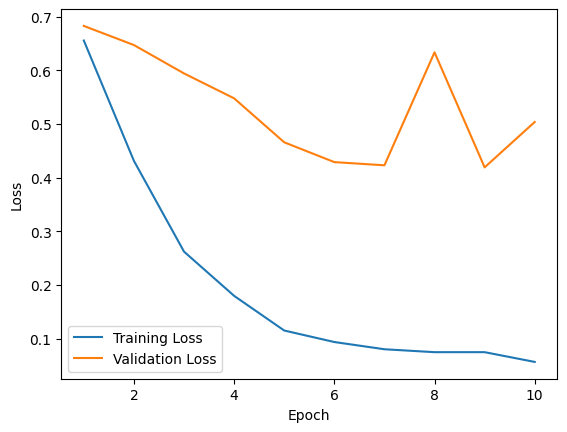

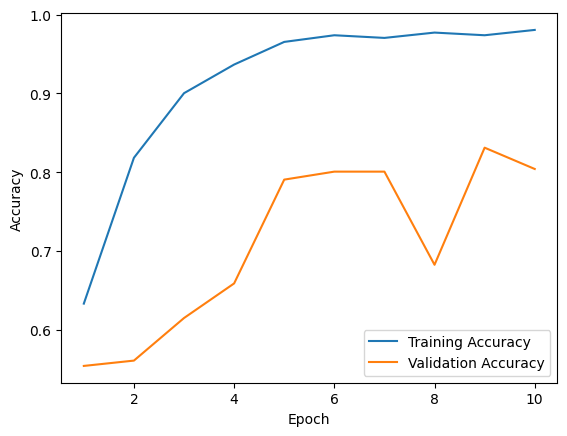

In [14]:
#Visualize the training performance over time 
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
#Evaluate Model performance on testing data
loss, accuracy = InitialModel.evaluate(X_test_vec.toarray(), y_test)
print(f'Loss {loss} Accuracy {accuracy}')

16/16 [==============================] - 0s 1ms/step - loss: 0.5739 - accuracy: 0.7692
Loss 0.5739309787750244 Accuracy 0.7692307829856873


In [21]:
#Now doing a grid search for different 
epochs = [3, 5, 10]
param_grid = { 'drop' : [0.2, 0.3, 0.5], 'learn' : [0.01, 0.1, 0.5]}
best_params = []
for epoch in epochs:
    model = KerasClassifier(build_fn = create_model, epochs = epoch)
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
    grid_search_result = grid_search.fit(X_train_vec.toarray(), y_train)
    best_params.append((grid_search_result.best_params_, epoch, grid_search_result.best_score_))

Epoch 1/3
31/31 [==============================] - 1s 3ms/step - loss: 0.7404 - accuracy: 0.5172
Epoch 2/3
31/31 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.6886
Epoch 3/3
16/16 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5172
Epoch 1/3
31/31 [==============================] - 1s 2ms/step - loss: 0.7090 - accuracy: 0.5751
Epoch 2/3
31/31 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.6998
Epoch 3/3
16/16 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5254
Epoch 1/3
31/31 [==============================] - 1s 3ms/step - loss: 0.7932 - accuracy: 0.5730
Epoch 2/3
31/31 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7110
Epoch 3/3
16/16 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5639
Epoch 1/3
31/31 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.6227
Epoch 2/3
31/31 [=============

In [22]:
for val in best_params:
    print(f"Best parameters {val[0]}, number of epochs {val[1]}, accuracy {val[2]}")

Best parameters {'drop': 0.5, 'learn': 0.1}, number of epochs 3, accuracy 0.622041920820872
Best parameters {'drop': 0.3, 'learn': 0.5}, number of epochs 5, accuracy 0.7586206992467245
Best parameters {'drop': 0.5, 'learn': 0.1}, number of epochs 10, accuracy 0.7816091974576315


In [25]:
#looking at the grid CV search the best parameter is with a dropout rate of 0.3, a learning rate of 0.5 and 10 epochs so we will evaluate the model with these values
#Fit the model
t0 = time.time()

#define the number of epochs
num_epochs = 10

InitialModel = create_model(0.5, 0.1)
history = InitialModel.fit(X_train_vec.toarray(), y_train, epochs = num_epochs, verbose = 2, validation_split = 0.2)
t1 = time.time()
print(f'Elapsed Time: {t1 - t0}')

Epoch 1/10
37/37 - 1s - loss: 0.8107 - accuracy: 0.5427 - val_loss: 0.6929 - val_accuracy: 0.5135
Epoch 2/10
37/37 - 0s - loss: 0.6582 - accuracy: 0.5976 - val_loss: 0.6965 - val_accuracy: 0.4459
Epoch 3/10
37/37 - 0s - loss: 0.6003 - accuracy: 0.6585 - val_loss: 0.6771 - val_accuracy: 0.4797
Epoch 4/10
37/37 - 0s - loss: 0.5252 - accuracy: 0.7498 - val_loss: 0.6340 - val_accuracy: 0.6757
Epoch 5/10
37/37 - 0s - loss: 0.4778 - accuracy: 0.7853 - val_loss: 0.5731 - val_accuracy: 0.8581
Epoch 6/10
37/37 - 0s - loss: 0.4192 - accuracy: 0.8208 - val_loss: 0.5191 - val_accuracy: 0.8514
Epoch 7/10
37/37 - 0s - loss: 0.3537 - accuracy: 0.8664 - val_loss: 0.4621 - val_accuracy: 0.8446
Epoch 8/10
37/37 - 0s - loss: 0.2917 - accuracy: 0.8859 - val_loss: 0.4055 - val_accuracy: 0.8547
Epoch 9/10
37/37 - 0s - loss: 0.2519 - accuracy: 0.9163 - val_loss: 0.3881 - val_accuracy: 0.8581
Epoch 10/10
37/37 - 0s - loss: 0.2178 - accuracy: 0.9189 - val_loss: 0.3606 - val_accuracy: 0.8716
Elapsed Time: 2.199

In [26]:
#Evaluate Model performance on testing data
loss, accuracy = InitialModel.evaluate(X_test_vec.toarray(), y_test)
print(f'Loss {loss} Accuracy {accuracy}')

16/16 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8097
Loss 0.4115235507488251 Accuracy 0.8097165822982788


After model selection, the best model is a fully connected neural network with 3 hidden layers, batch normalization and dropout after each layer, a learning rate of 0.1, a dropout rate of 0.5 and 10 epochs. 